In [1]:
from numpy import *
from scipy import *
import numpy as np
from matplotlib import *

from scipy import integrate
from scipy import interpolate
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

import xlrd
import xlsxwriter

rc('text',usetex = True)
rc('font', family='serif',size = 12)

In [2]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
Eff = Data.sheet_by_name('Eff')


Effect = []

for i in range(7):
     Effect.append(array(Eff.col_values(i)))

phi = np.arange(0.1,2.01,0.1)
NTU = np.arange(50,351,50)
NN,PP = np.meshgrid(NTU,phi)
Effectiv = interpolate.interp2d(phi,NTU,Effect,kind = 'linear')

In [3]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
HEx = Data.sheet_by_name('HEx_Cold')

m_f_HEx_c   = array(HEx.col_values(0)) 
Ec_HEx_c   = array(HEx.col_values(1)) 
W_T_HEx_c   = array(HEx.col_values(2)) 
W_f_HEx_c   = array(HEx.col_values(3)) 
W_p_HEx_c   = array(HEx.col_values(4)) 

In [4]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
HEx = Data.sheet_by_name('HEx_Hot')

m_f_HEx_h   = array(HEx.col_values(0)) 
Ec_HEx_h   = array(HEx.col_values(1)) 
W_T_HEx_h   = array(HEx.col_values(2)) 
W_f_HEx_h   = array(HEx.col_values(3)) 
W_p_HEx_h   = array(HEx.col_values(4)) 

def HEx_Power(m_f_HEx,W_T_HEx,W_f_HEx,W_p_HEx,Ec_HEx,m_f,ECr):
    A = 0
    B = 9
    
    for i in range(len(m_f_HEx)-1):
        if np.round(m_f,4) == np.round(m_f_HEx[i],4) and np.round(m_f,4) < np.round(m_f_HEx[i+1],4):
            B = i
            #print(B)
            break
    print(B,m_f,m_f_HEx[B],m_f_HEx[B+1])
    for i in range(B,0,-1):
        if m_f_HEx[i] == m_f_HEx[B]:
            A = i
        else:
            break
    print(A,B,m_f_HEx[A],m_f_HEx[B])
    C = len(Ec_HEx)-1
    D = len(Ec_HEx)-1
    for i in range(A,B):
        print(i,C)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ec_HEx[C]) and ECr < Ec_HEx[i]:
            C = i
            #print('oic',C)
    for i in range(B,A,-1):
        print(i,D)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ec_HEx[D]) and ECr > Ec_HEx[i]:
            D = i
            #print('oid',D)
    print(C,D,Ec_HEx[C],Ec_HEx[D])
    W_T = W_T_HEx[C]+(W_T_HEx[D]-W_T_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_f = W_f_HEx[C]+(W_f_HEx[D]-W_f_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_p = W_p_HEx[C]+(W_p_HEx[D]-W_p_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])          
    return(W_T,W_f,W_p)

In [5]:
def HEx_Power(m_f_HEx,W_T_HEx,W_f_HEx,W_p_HEx,Ec_HEx,m_f,ECr):
    A = 0
    B = 9
    
    for i in range(len(m_f_HEx)-1):
        if np.round(m_f,4) == np.round(m_f_HEx[i],4) and np.round(m_f,4) < np.round(m_f_HEx[i+1],4):
            B = i
            #print(B)
            break
    #print(B,m_f,m_f_HEx[B],m_f_HEx[B+1])
    for i in range(B,0,-1):
        if m_f_HEx[i] == m_f_HEx[B]:
            A = i
        else:
            break
    #print(A,B,m_f_HEx[A],m_f_HEx[B])
    C = len(Ec_HEx)-1
    D = len(Ec_HEx)-1
    Ref_C = 1
    Ref_D = 0
    for i in range(A,B):
        #print(i,C)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ref_C) and ECr < Ref_C:
            C = i
            Ref_C = Ec_HEx[i]
            #print('oic',C)
    for i in range(B,A,-1):
        #print(i,D)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ref_D) and ECr > Ref_D:
            D = i
            Ref_D = Ec_HEx[i]
            #print('oid',D)
    #print(C,D,Ec_HEx[C],Ec_HEx[D])
    W_T = W_T_HEx[C]+(W_T_HEx[D]-W_T_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_f = W_f_HEx[C]+(W_f_HEx[D]-W_f_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_p = W_p_HEx[C]+(W_p_HEx[D]-W_p_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])          
    return(W_T,W_f,W_p)

In [6]:
def Radius(X): 
    R2,R3,B,L_m,L_r,h = X
    #return (1.41634776*(R2**-1.10684344)*(R3**2.08169412)*(B**0.74232364))
    #return((B/((0.7390256*R2**1.49668268*R3**-2.71694101)*1.025343*np.exp(-33.1224/L_m)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.23379933))
    #return((B/((0.74794602381*R2**1.50307868*R3**-2.73422634)*1.025343*np.exp(-33.1224/L_m)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.240075))
    A1 = ((B/((0.74794602381*R2**1.50307868*R3**-2.73422634)*1.025343*np.exp(-33.1224/L_m)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.240075))
    #A2 = (B/((0.99497192*R2**1.55620764*R3**(-2.77937455))*np.exp(-0.92376442*(R3-R2)/L_m)*(h**0.08060702)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.1223844)
    A2 = (B/((1.71951251*R2**2.10853942*R3**(-3.7047729))*np.exp(-19.28562192/L_m)*(h**0.06469294)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.38270461)
    return(A2)

In [7]:
def MagField(X,a,b,c,d,e,f):
    R2,R3,R4,h,L,B_rem = X
    return (a*(B_rem)*(R2**b)*(R3**c)*(R4**d)*(np.exp(e*(R3-R2)/L))*(h**f))

In [8]:
def MField(X,a,b,c,d,e):
    V_gap,V_mag,V_out,L,B_rem,R_4 = X
    return (a*(B_rem)*((V_gap/V_mag)**b)*(np.exp(c*R_4/L))*(np.tanh(d*(V_out/V_mag))+e))

In [9]:
def MField_2(X,a,b,c,d,e,f,g):
    R2,R3,R4,L,B_rem,R5 = X
    return (a*(B_rem)*(R2**b)*(R3**c)*(R4**d)*(np.exp(e*(R3-R2)/L))*(np.tanh(f*(R5**2-R4**2)/(R4**2-R3**2))+g))

In [10]:
def Qc(X): 
    P1,P2,P3,P4,P5= X #Q_pas_CB,Q_act_CB,Q_span,W_mag,W_p
    #return( 0.44774473*P1+0.69113695*P2-0.46543184*P3+0.02740828*P4-1.2412753 *P5)
    #return(0.271043*P1+0.49653155*P2-0.28565907*P3+1*P4-1.13502211*P5)
    #return(0.66679759*P1 +  0.8505155*P2 -0.6893551*P3 -0.94156247*P4-0.34938015*P5)
    return(0.59410225*P1+  0.88061713*P2 -0.62088895*P3 -1*P4         -0.34465627*P5)

In [11]:
def Qh(X): 
    P1,P2,P3,P4,P5= X
    #return(0.46673225*P1+1.40322589*P2-0.49908018*P3+0.01575257*P4-0.68914607*P5)
    #return(0.36735687*P1+1*P2-0.38713269*P3+1*P4-0.21881993*P5)
    #return(0.77855664*P1+ 1.44966907*P2 -0.80985607*P3+ 0.39133248*P4+  0.65808892*P5)
    return(0.71673365*P1 + 1.42540766*P2 -0.74956013*P3  + 0.63910187*P4 + 0.64031711*P5)

def W_m(X):
    P1,P2,P3 = X
    #a = 0.00541105
    #a = 0.00937193
    a = 2.89392107e-03
    
    #b = -2.21029128
    #b = -0.99809109
    b = -3.14070133e+00
    
    #c = 2.84461382
    #c = 4.33008264
    c = 3.20699560e+00
    
    #d = 2.85861479
    #d = 1.61088792
    d = 3.81307556e+00
    
    return(a*P1**b*P2**c*P3**d )

In [12]:
def W_m(P1,P2,P3,m_s,f):
    
    a = -4.24746211e-05
    b = 8.59623501e-01
    c = 3.06311253e-05
    d = 8.29382882e-01,
    e = 6.04968831e-01,
    
    return (m_s*f*P3*(a*P1**b+c*(P2)**d)*P3**e)

In [13]:
def W_Hex(X):
    P1,P2 = X
    return (a*P1**b + c*P2**d)

In [14]:
def Prop_param(X):
    T_c,T_h,B = X
    C_H = 1.65161038/100*T_c+2.59946197*T_h-1.14324309*100*B
    C_L = 10.16443738*T_c-5.32568341*T_h-0.71305997*B
    dT_mg = -0.01057708*T_c+0.01163704*T_h+1.73509682*B
    dT_dmg = -0.01229483*T_c+0.01376157*T_h+0.76454655*B
    CdT_mg = -9.517569*T_c+11.49711993*T_h+820.04168503*B
    CdT_dmg = 4.39480124*T_c-7.07931118/10*T_h+9.15928168*100*B
    return(C_H,C_L,dT_mg,dT_dmg,CdT_mg,CdT_dmg)

In [15]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx') #Import inputs File
Inputs = Data.sheet_by_name('Data') 

L   = array(Inputs.col_values(0)) #Import AMR Length [mm]
H   = array(Inputs.col_values(1)) #Import AMR Height [mm]
W   = array(Inputs.col_values(2)) #Import AMR Width [mm]
T_c = array(Inputs.col_values(3))+273.15 #Import temperature span [K]
T_h = array(Inputs.col_values(4))+273.15 #Import temperature span [K]
B   = array(Inputs.col_values(5)) #Import magnetic field [T]
f   = array(Inputs.col_values(6)) #Import frequency [Hz]
m_f = array(Inputs.col_values(7))/3600 #Import mass flow rate [kg/h]
Q_c = array(Inputs.col_values(8)) #Import Cooling capacity [W]
Q_h = array(Inputs.col_values(9)) #Import Rejected heat [W]
W_p = array(Inputs.col_values(10)) #Import Pumping power [W]
W_ma = array(Inputs.col_values(11)) #Import Magnetic power [W]
T_c_ml = array(Inputs.col_values(12))+273.15 #Import temperature span [K]
T_h_ml = array(Inputs.col_values(13))+273.15 #Import temperature span [K]


Calculation

In [153]:
def Optimal(m_f,FE,f,L,H,W,B,Tc,Th,Tce,The,L_xt,h_f):
    
    ##Properties of the solid 
    #rho_s = 7900  #[kg/m3] Density of the solid
    #k_s   = 8 #[W/(m2.K)] #Thermal conductivity of the solid

    ## Propertis of the fluid
    #rho_f = 1000  #[kg/m3] Density of the fluid
    #c_f   = 4181  #[kJ/(kg.K)] # Specific heat of the fluid
    #Pr_f  = 6.136 #[-] Prandtl of the fluid
    #mu_f  = 0.00061 #0.0008901 #[kg/m-2] #Viscosity of the fluid
    #k_f   = 0.6065  #[W/(m2.K)] #Thermal conductivity of the fluid

    ## Porous medium
    #d_p = 500*10**(-6) #[m] Particle diameter
   
    #Epsilon = 0.45 #0.55  #[-] Porosity
    #Epsilon_dp = 0.36 #0.465 #[-] Porosity
    d_ph = (2/3)*Epsilon_dp/(1-Epsilon_dp)*d_p #290*10**(-6) #[m] Particle diameter
        
    #Magnetic Circuit
    #B_rem = 1.43
    #N_p = 2
    #N_Rp = 2
    
    ### CALCULATION ###
    
    #Porous medium
    

    N_reg = 4/FE
    
    #Regenerador Quadrad
    R2 = [W/2+t_w]/np.tan(np.pi/N_reg)-t_h
    R3 = np.sqrt((W/2)**2 + (R2+t_h+H)**2)+t_h
    
   
    
    #R_aux = np.sqrt((R2+t_h)**2-(W/2)**2)
    #R3 = np.sqrt((H+8+R_aux)**2+(W/2)**2)
    
    #Regenerador Circular
    
    #R_med = (4/FE)/(2*np.pi)*(W + 2*t_w)
    #R2 = R_med-(H/2+t_h)
    #R3 = R_med+(H/2+t_h)
    
    #A_st = H*W
    #A_aux_st = ((2*np.pi/(4/FE)-4*t_w/(R2+R3))/2)*((R3-t_h)**2-(R2+t_h)**2)
    A_aux_st = (np.pi/(4/FE))*((R3-t_h)**2-(R2+t_h)**2) - 2*t_w*((R3-t_h)-(R2+t_h))
    A_st = A_aux_st[0]
    

    m_s   = L*A_st*10**-9*(1-Epsilon)*rho_s #mass of the AMR

    Beta = (1-Epsilon)*6/d_p
    v_s   = (m_f)/(rho_f*A_st*10**-6) #Superficial velocity

    #Dimensionless Numbers
    Re_dp = d_p*v_s*rho_f/(mu_f) #Reynolds number
    Nu = 2*(1+4*(1-Epsilon_dp)/Epsilon_dp)+((1-Epsilon_dp)**0.5)*Re_dp**0.6*Pr_f**(1/3) # Nusselt number
    Pe = Re_dp*Pr_f
    h_int = Nu*k_f/d_p
    NTU_f  = h_int*Beta*(L*A_st*10**(-9))/(m_f*c_f) 
    #print(Re_dp)
    dP = (L/1000)*(150*(1-Epsilon_dp)**2*mu_f*v_s/(Epsilon_dp**3*d_p**2) + 1.75*(1-Epsilon_dp)*rho_f*v_s**2/(Epsilon_dp**3*d_p))
    
    #dP = 0.5*413.11*(v_s*d_ph*rho_f/mu_f)**-0.514*rho_f*v_s**2*(L/1000)/d_ph
    #print(dP/dP_1)
    
    #Effective conduction
    #k_e_f = k_f*Epsilon #Fluid effective conduction

    #a_0 = exp(-1.084-6.778*(Epsilon-0.298))
    #f_0 = 0.8
    #k_e_s = k_f*((1-a_0)*(Epsilon*f_0+(1-Epsilon*f_0)*k_s/k_f)/(1-Epsilon*(1-f_0)+k_s/k_f*Epsilon*(1-f_0))+a_0*(2*((k_s/k_f)**2)*(1-Epsilon)+(1+2*Epsilon)*k_s/k_f)/((2+Epsilon)*k_s/k_f+(1-Epsilon))) #Solid effective conduction

    #D_ = (k_f*rho_f/c_f)*0.75*Pe/2

    #k_s_eff = k_e_s
    #k_f_eff = k_e_f + rho_f*c_f*D_
    
    ##### Properties Calculation ######   
    C_H,C_L,dT_mg,dT_dmg,CdT_mg,CdT_dmg = Prop_param((Tce,The,B))

    ##### Porous media effectivness #####

    C_HB = ((m_f)*c_f)/(m_s*C_L*f)
    C_CB = ((m_f)*c_f)/(m_s*C_H*f)

    Efness_HB = Effectiv(C_HB/2,NTU_f)
    Efness_CB = Effectiv(C_CB/2,NTU_f)

    #print(Efness_HB,Efness_CB,h_int,Nu,v_s,Re_dp)


    ## Metrics ##
    Pi_4 = CdT_mg/CdT_dmg
    Pi_6 = ((m_f)*c_f)/(m_s*C_L*f)
    Pi_11 = ((m_f)*c_f)/(m_s*C_H*f)
    Pi_15 = (C_L-C_H)*(The-Tce)
    
    Q_pas_CB = Efness_CB*(The - Tce)*m_f*FE*c_f
    Q_act_CB = dT_mg*m_f*c_f*FE

    Q_pas_HB = Efness_HB*(The - Tce)*m_f*FE*c_f
    Q_act_HB = dT_dmg*m_f*c_f*FE

    Q_span = (The - Tce)*m_f*c_f*FE
    #Q_cond = ((1-Epsilon)*k_s_eff + Epsilon*k_f_eff)*(W*H*10**-6)*(The-Tce)/L
    W_mag  = m_s*f*(CdT_mg - CdT_dmg)
    W_mag = W_m(Pi_6,Pi_11,Pi_15,m_s,f)
    W_pump = dP*m_f/rho_f*2*(FE)
    #print(Q_pas_CB,Q_act_CB,Q_span,W_mag,W_pump)

    ######Calculation#######
    
    FL = (0.45238549*(1+L_xt)**3-2.34797947*(1+L_xt)**2 +4.06737728*(1+L_xt)-1.44601011)*R2**-0.14716104*R3**(0.15172723)
    
    Qc_reg = Qc((Q_pas_CB,Q_act_CB,Q_span,W_mag,W_pump))*FL
    Qh_reg = Qh((Q_pas_HB,Q_act_HB,Q_span,W_mag,W_pump))*FL
    #print(Qc_reg,Qh_reg)
    #N_reg = Qc_target/Qc_reg
    Qc_target = Qc_reg*N_reg 
    Qh_target = Qh_reg*N_reg

    ECr_c = Qc_target/(FE*N_reg*m_f*c_f*(Tc-Tce))
    ECr_h = Qh_target/(FE*N_reg*m_f*c_f*(The-Th))
    
    B_rem = 1.43
    

    R4 = Radius((R2,R3,B/B_rem,L*(1+L_xt),L,h_f))
    

    
    #print(m_s,f,CdT_dmg,((Pi_6,Pi_4,Pi_11)))
    

    
    return (Qc_target,ECr_c,ECr_h,R4,R3,R2,W_mag,W_pump,Qh_target,L_xt,FL,dP)

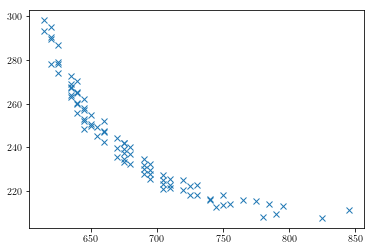

In [321]:
plt.plot(m_f_p,m_p,'x')

In [562]:
m_f = np.arange(500,900,5)/3600
FE  = np.arange(25/100,30/100,5/100) 
f = np.arange(6,6.1,1)
L = np.arange(90,96,5)
H = np.arange(18,26,1)
W = np.arange(28,35,1)
B_max = np.arange(1.3,1.37,0.03)
Tce = np.arange(15,16,2)
The = np.arange(42,43,2)
L_xt = np.arange(0.15,0.35,0.02)
d_par = np.arange(700*10**-6,701*10**-6,200*10**-6)
h_f = np.arange(25,29,5)
#d_par = [500*10**-6]

In [563]:
len(FE)*len(f)*len(L)*len(H)*len(W)*len(Tce)*len(The)*len(B_max)*len(L_xt)*len(d_par)*len(h_f)

3360

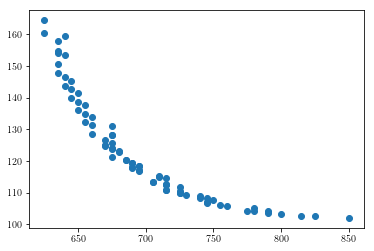

In [564]:
plt.plot(m_f_p,m_Rt_p,'o')

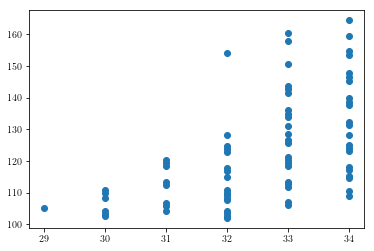

In [565]:
plt.plot(W_p,m_Rt_p,'o')

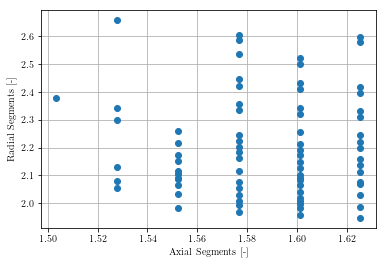

In [566]:
plt.plot((1+np.array(L_xt_p))*np.array(L_p)/90,(np.array(R4_p) - np.array(R3_p))/50,'o')

plt.grid()
plt.xlabel('Axial Segments [-]')
plt.ylabel('Radial Segments [-]')
#plt.ylim(1100,1300)
#plt.xlim(700,750)
plt.savefig('N_segments.png',format = 'png', dpi=500,bbox_inches='tight')

In [567]:
Q_c = []
cont = 0

T_c = 22
T_h = 35

Q_c_target = 2500

m_f_target = []
FE_target = []
f_target = []
L_target = []
H_target = []
W_target = []
Tce_target = []
The_target = []
ECr_c = []
ECr_h = []
R4 = []
R3 = []
R2 = []
W_mag = []
W_pump = []
B_target = []
Q_h = []
L_xt_target = []
FL_target = []
dp_target = []
hf_target = []
PD_target = []

##Properties of the solid 
rho_s = 7000  #[kg/m3] Density of the solid
k_s   = 8 #[W/(m2.K)] #Thermal conductivity of the solid

## Propertis of the fluid
rho_f = 1000  #[kg/m3] Density of the fluid
c_f   = 4181  #[kJ/(kg.K)] # Specific heat of the fluid
Pr_f  = 6.136 #[-] Prandtl of the fluid
mu_f  = 0.00061 #0.0008901 #[kg/m-2] #Viscosity of the fluid
k_f   = 0.6065  #[W/(m2.K)] #Thermal conductivity of the fluid

## Porous medium


#Magnetic Circuit
B_rem = 1.43
N_p = 2
N_Rp = 2

t_h = 2
t_w = 1

for i in range(size(FE)):
    for j in range(len(f)):
        for k in range(len(L)):
            for l in range(len(H)):
                for m in range(len(W)):
                    for n in range(len(Tce)):
                        for o in range(len(The)):
                            for p in range(len(B_max)):
                                for q in range(len(L_xt)):
                                    for r in range(len(d_par)):
                                        for s in range(len(h_f)):
                                            it = 0
                                            Q_c_system = 0

                                            d_p = d_par[r] #[m] Particle diameter

                                            Epsilon = 0.5 #0.55  #[-] Porosity
                                            Epsilon_ep = 0.2
                                            Epsilon_dp = Epsilon - Epsilon_ep #0.36 #0.465 #[-] Porosity
                                            d_ph = (2/3)*Epsilon_dp/(1-Epsilon_dp)*d_p #290*10**(-6) #[m] Particle diameter
                                            #h_f = 40

                                            while Q_c_system < Q_c_target and it < len(m_f):
                                                A,B,C,D,E,F,G,A1,A2,A3,A4,A5 = Optimal(m_f[it],FE[i],f[j],L[k],H[l],W[m],B_max[p],T_c+273.15,T_h+273.15,Tce[n]+273.15,The[o]+273.15,L_xt[q],h_f[s])
                                                Q_c_system = A[0]
                                                it = it + 1
                                                #print(A,B,C,D,E,F,G,A1,A2,A3)
                                                #print(m_f[it-1]*3600,Q_c_system )
                                            #print(it,Q_c_system)
                                            if Q_c_system > Q_c_target:
                                                Q_c.append(Q_c_system)
                                                m_f_target.append(3600*m_f[it-1])
                                                FE_target.append(FE[i])
                                                f_target.append(f[j])
                                                L_target.append(L[k])
                                                H_target.append(H[l])
                                                W_target.append(W[m])
                                                Tce_target.append(Tce[n])
                                                The_target.append(The[o])
                                                B_target.append(B_max[p])
                                                dp_target.append(d_p)
                                                hf_target.append(h_f[s])
                                                PD_target.append(A5)
                                                
                                                ECr_c.append(B[0])
                                                ECr_h.append(C[0])
                                                R4.append(D[0])
                                                R3.append(E[0])
                                                R2.append(F[0])
                                                W_mag.append(G[0])
                                                W_pump.append(A1)
                                                Q_h.append(A2[0])
                                                L_xt_target.append(A3)
                                                FL_target.append(A4)

                                            cont = cont+1
                                    print(100*cont/(len(FE)*len(f)*len(L)*len(H)*len(W)*len(Tce)*len(The)*len(B_max)*len(L_xt)*len(d_par)*len(h_f)))


0.02976190476190476
0.05952380952380952
0.08928571428571429
0.11904761904761904
0.1488095238095238
0.17857142857142858
0.20833333333333334
0.23809523809523808
0.26785714285714285
0.2976190476190476
0.3273809523809524
0.35714285714285715
0.3869047619047619
0.4166666666666667
0.44642857142857145
0.47619047619047616
0.5059523809523809
0.5357142857142857
0.5654761904761905
0.5952380952380952
0.625
0.6547619047619048
0.6845238095238095
0.7142857142857143
0.7440476190476191
0.7738095238095238
0.8035714285714286
0.8333333333333334
0.8630952380952381
0.8928571428571429
0.9226190476190477
0.9523809523809523
0.9821428571428571
1.0119047619047619
1.0416666666666667
1.0714285714285714
1.1011904761904763
1.130952380952381
1.1607142857142858
1.1904761904761905
1.2202380952380953
1.25
1.2797619047619047
1.3095238095238095
1.3392857142857142
1.369047619047619
1.3988095238095237
1.4285714285714286
1.4583333333333333
1.4880952380952381
1.5178571428571428
1.5476190476190477
1.5773809523809523
1.607142857

14.226190476190476
14.255952380952381
14.285714285714286
14.31547619047619
14.345238095238095
14.375
14.404761904761905
14.43452380952381
14.464285714285714
14.494047619047619
14.523809523809524
14.553571428571429
14.583333333333334
14.613095238095237
14.642857142857142
14.672619047619047
14.702380952380953
14.732142857142858
14.761904761904763
14.791666666666666
14.821428571428571
14.851190476190476
14.880952380952381
14.910714285714286
14.94047619047619
14.970238095238095
15.0
15.029761904761905
15.05952380952381
15.089285714285714
15.119047619047619
15.148809523809524
15.178571428571429
15.208333333333334
15.238095238095237
15.267857142857142
15.297619047619047
15.327380952380953
15.357142857142858
15.386904761904763
15.416666666666666
15.446428571428571
15.476190476190476
15.505952380952381
15.535714285714286
15.56547619047619
15.595238095238095
15.625
15.654761904761905
15.68452380952381
15.714285714285714
15.744047619047619
15.773809523809524
15.803571428571429
15.833333333333334

28.00595238095238
28.035714285714285
28.06547619047619
28.095238095238095
28.125
28.154761904761905
28.18452380952381
28.214285714285715
28.24404761904762
28.273809523809526
28.303571428571427
28.333333333333332
28.363095238095237
28.392857142857142
28.422619047619047
28.452380952380953
28.482142857142858
28.511904761904763
28.541666666666668
28.571428571428573
28.601190476190474
28.63095238095238
28.660714285714285
28.69047619047619
28.720238095238095
28.75
28.779761904761905
28.80952380952381
28.839285714285715
28.86904761904762
28.898809523809526
28.928571428571427
28.958333333333332
28.988095238095237
29.017857142857142
29.047619047619047
29.077380952380953
29.107142857142858
29.136904761904763
29.166666666666668
29.196428571428573
29.226190476190474
29.25595238095238
29.285714285714285
29.31547619047619
29.345238095238095
29.375
29.404761904761905
29.43452380952381
29.464285714285715
29.49404761904762
29.523809523809526
29.553571428571427
29.583333333333332
29.613095238095237
29.6

41.99404761904762
42.023809523809526
42.05357142857143
42.083333333333336
42.11309523809524
42.142857142857146
42.17261904761905
42.20238095238095
42.232142857142854
42.26190476190476
42.291666666666664
42.32142857142857
42.351190476190474
42.38095238095238
42.410714285714285
42.44047619047619
42.470238095238095
42.5
42.529761904761905
42.55952380952381
42.589285714285715
42.61904761904762
42.648809523809526
42.67857142857143
42.708333333333336
42.73809523809524
42.767857142857146
42.79761904761905
42.82738095238095
42.857142857142854
42.88690476190476
42.916666666666664
42.94642857142857
42.976190476190474
43.00595238095238
43.035714285714285
43.06547619047619
43.095238095238095
43.125
43.154761904761905
43.18452380952381
43.214285714285715
43.24404761904762
43.273809523809526
43.30357142857143
43.333333333333336
43.36309523809524
43.392857142857146
43.42261904761905
43.45238095238095
43.482142857142854
43.51190476190476
43.541666666666664
43.57142857142857
43.601190476190474
43.63095

55.625
55.654761904761905
55.68452380952381
55.714285714285715
55.74404761904762
55.773809523809526
55.80357142857143
55.833333333333336
55.86309523809524
55.892857142857146
55.92261904761905
55.95238095238095
55.982142857142854
56.01190476190476
56.041666666666664
56.07142857142857
56.101190476190474
56.13095238095238
56.160714285714285
56.19047619047619
56.220238095238095
56.25
56.279761904761905
56.30952380952381
56.339285714285715
56.36904761904762
56.398809523809526
56.42857142857143
56.458333333333336
56.48809523809524
56.517857142857146
56.54761904761905
56.57738095238095
56.607142857142854
56.63690476190476
56.666666666666664
56.69642857142857
56.726190476190474
56.75595238095238
56.785714285714285
56.81547619047619
56.845238095238095
56.875
56.904761904761905
56.93452380952381
56.964285714285715
56.99404761904762
57.023809523809526
57.05357142857143
57.083333333333336
57.11309523809524
57.142857142857146
57.17261904761905
57.20238095238095
57.232142857142854
57.26190476190476


69.70238095238095
69.73214285714286
69.76190476190476
69.79166666666667
69.82142857142857
69.85119047619048
69.88095238095238
69.91071428571429
69.94047619047619
69.9702380952381
70.0
70.0297619047619
70.05952380952381
70.08928571428571
70.11904761904762
70.14880952380952
70.17857142857143
70.20833333333333
70.23809523809524
70.26785714285714
70.29761904761905
70.32738095238095
70.35714285714286
70.38690476190476
70.41666666666667
70.44642857142857
70.47619047619048
70.50595238095238
70.53571428571429
70.56547619047619
70.5952380952381
70.625
70.6547619047619
70.68452380952381
70.71428571428571
70.74404761904762
70.77380952380952
70.80357142857143
70.83333333333333
70.86309523809524
70.89285714285714
70.92261904761905
70.95238095238095
70.98214285714286
71.01190476190476
71.04166666666667
71.07142857142857
71.10119047619048
71.13095238095238
71.16071428571429
71.19047619047619
71.2202380952381
71.25
71.2797619047619
71.30952380952381
71.33928571428571
71.36904761904762
71.3988095238095

84.07738095238095
84.10714285714286
84.13690476190476
84.16666666666667
84.19642857142857
84.22619047619048
84.25595238095238
84.28571428571429
84.31547619047619
84.3452380952381
84.375
84.4047619047619
84.43452380952381
84.46428571428571
84.49404761904762
84.52380952380952
84.55357142857143
84.58333333333333
84.61309523809524
84.64285714285714
84.67261904761905
84.70238095238095
84.73214285714286
84.76190476190476
84.79166666666667
84.82142857142857
84.85119047619048
84.88095238095238
84.91071428571429
84.94047619047619
84.9702380952381
85.0
85.0297619047619
85.05952380952381
85.08928571428571
85.11904761904762
85.14880952380952
85.17857142857143
85.20833333333333
85.23809523809524
85.26785714285714
85.29761904761905
85.32738095238095
85.35714285714286
85.38690476190476
85.41666666666667
85.44642857142857
85.47619047619048
85.50595238095238
85.53571428571429
85.56547619047619
85.5952380952381
85.625
85.6547619047619
85.68452380952381
85.71428571428571
85.74404761904762
85.773809523809

98.57142857142857
98.60119047619048
98.63095238095238
98.66071428571429
98.69047619047619
98.7202380952381
98.75
98.7797619047619
98.80952380952381
98.83928571428571
98.86904761904762
98.89880952380952
98.92857142857143
98.95833333333333
98.98809523809524
99.01785714285714
99.04761904761905
99.07738095238095
99.10714285714286
99.13690476190476
99.16666666666667
99.19642857142857
99.22619047619048
99.25595238095238
99.28571428571429
99.31547619047619
99.3452380952381
99.375
99.4047619047619
99.43452380952381
99.46428571428571
99.49404761904762
99.52380952380952
99.55357142857143
99.58333333333333
99.61309523809524
99.64285714285714
99.67261904761905
99.70238095238095
99.73214285714286
99.76190476190476
99.79166666666667
99.82142857142857
99.85119047619048
99.88095238095238
99.91071428571429
99.94047619047619
99.9702380952381
100.0


In [568]:
N_circ_cold = 7
N_circ_hot = 7

W_FT_c = np.zeros(len(m_f_target))
W_Ff_c = np.zeros(len(m_f_target))
W_Fp_c = np.zeros(len(m_f_target))

W_FT_h = np.zeros(len(m_f_target))
W_Ff_h = np.zeros(len(m_f_target))
W_Fp_h = np.zeros(len(m_f_target))


for i in range(len(m_f_target)):
    print(i/len(m_f_target)*100)
    [W_FT_c[i],W_Ff_c[i],W_Fp_c[i]] = HEx_Power(m_f_HEx_c,W_T_HEx_c,W_f_HEx_c,W_p_HEx_c,Ec_HEx_c,4*m_f_target[i]/N_circ_cold,ECr_c[i])
    [W_FT_h[i],W_Ff_h[i],W_Fp_h[i]] = HEx_Power(m_f_HEx_h,W_T_HEx_h,W_f_HEx_h,W_p_HEx_h,Ec_HEx_h,4*m_f_target[i]/N_circ_hot,ECr_h[i])
    #if W_FT_c[i] == 'Nan':
        #print(4*m_f_target[i]/8,ECr_c[i])
    #if W_FT_c[i] == 'Nan':
        #print(4*m_f_target[i]/8,ECr_h[i])

0.0
0.0543773790103317
0.1087547580206634
0.1631321370309951
0.2175095160413268
0.27188689505165853
0.3262642740619902
0.38064165307232195
0.4350190320826536
0.48939641109298526
0.5437737901033171
0.5981511691136487
0.6525285481239804
0.7069059271343121
0.7612833061446439
0.8156606851549755
0.8700380641653072
0.9244154431756388
0.9787928221859705
1.0331702011963024
1.0875475802066341
1.1419249592169658
1.1963023382272975
1.2506797172376292
1.3050570962479608
1.3594344752582925
1.4138118542686242
1.468189233278956
1.5225666122892878
1.5769439912996193
1.631321370309951
1.6856987493202826
1.7400761283306143
1.794453507340946
1.8488308863512777
1.9032082653616094
1.957585644371941
2.011963023382273
2.066340402392605
2.1207177814029365
2.1750951604132682
2.2294725394236
2.2838499184339316
2.3382272974442633
2.392604676454595
2.4469820554649266
2.5013594344752583
2.55573681348559
2.6101141924959217
2.6644915715062534
2.718868950516585
2.7732463295269167
2.8276237085372484
2.88200108754758
2

24.469820554649267
24.524197933659597
24.57857531266993
24.63295269168026
24.687330070690592
24.741707449700925
24.79608482871126
24.850462207721588
24.90483958673192
24.95921696574225
25.013594344752583
25.067971723762916
25.122349102773246
25.17672648178358
25.231103860793908
25.28548123980424
25.339858618814574
25.394235997824904
25.44861337683524
25.502990755845566
25.557368134855903
25.61174551386623
25.666122892876565
25.72050027188689
25.774877650897228
25.82925502990756
25.88363240891789
25.938009787928223
25.992387166938553
26.046764545948886
26.101141924959215
26.155519303969548
26.20989668297988
26.26427406199021
26.318651441000547
26.373028820010873
26.42740619902121
26.481783578031536
26.536160957041872
26.590538336052198
26.644915715062535
26.699293094072868
26.753670473083197
26.80804785209353
26.86242523110386
26.916802610114193
26.971179989124522
27.025557368134855
27.07993474714519
27.134312126155518
27.188689505165854
27.24306688417618
27.297444263186517
27.351821642

48.939641109298535
48.99401848830887
49.04839586731919
49.10277324632953
49.15715062533986
49.21152800435019
49.26590538336052
49.32028276237085
49.374660141381185
49.42903752039152
49.48341489940185
49.53779227841218
49.59216965742252
49.64654703643284
49.700924415443176
49.7553017944535
49.80967917346384
49.864056552474175
49.9184339314845
49.97281131049483
50.02718868950517
50.08156606851549
50.13594344752583
50.19032082653616
50.24469820554649
50.29907558455683
50.35345296356716
50.40783034257748
50.462207721587816
50.51658510059816
50.57096247960848
50.625339858618815
50.67971723762915
50.73409461663948
50.78847199564981
50.84284937466014
50.89722675367048
50.95160413268081
51.00598151169113
51.060358890701465
51.114736269711806
51.16911364872213
51.22349102773246
51.2778684067428
51.33224578575313
51.386623164763456
51.44100054377378
51.49537792278412
51.549755301794455
51.60413268080478
51.65851005981512
51.71288743882545
51.76726481783578
51.821642196846106
51.876019575856446
5

73.79010331702011
73.84448069603046
73.89885807504079
73.95323545405111
74.00761283306144
74.06199021207178
74.11636759108211
74.17074497009244
74.22512234910276
74.27949972811311
74.33387710712344
74.38825448613376
74.44263186514411
74.49700924415443
74.55138662316476
74.60576400217509
74.66014138118543
74.71451876019576
74.76889613920609
74.82327351821642
74.87765089722676
74.93202827623708
74.98640565524741
75.04078303425776
75.09516041326808
75.14953779227841
75.20391517128874
75.25829255029907
75.31266992930941
75.36704730831974
75.42142468733007
75.4758020663404
75.53017944535073
75.58455682436107
75.6389342033714
75.69331158238172
75.74768896139206
75.80206634040239
75.85644371941272
75.91082109842306
75.96519847743338
76.01957585644372
76.07395323545406
76.12833061446437
76.18270799347472
76.23708537248504
76.29146275149537
76.3458401305057
76.40021750951604
76.45459488852637
76.5089722675367
76.56334964654704
76.61772702555737
76.6721044045677
76.72648178357802
76.780859162588

98.74932028276237
98.8036976617727
98.85807504078304
98.91245241979337
98.9668297988037
99.02120717781403
99.07558455682435
99.12996193583469
99.18433931484503
99.23871669385535
99.29309407286569
99.34747145187602
99.40184883088635
99.45622620989668
99.510603588907
99.56498096791735
99.61935834692768
99.673735725938
99.72811310494835
99.78249048395867
99.836867862969
99.89124524197933
99.94562262098967


In [569]:
W_p_valve = (2*np.array(m_f_target)/4/1000)**2*10**5**(2*np.array(m_f_target)/3600)/1000*4/np.array(FE_target)
W_valve   = 8*16

In [570]:
m_La = (np.pi*((np.array(R3)-t_h)**2-(np.array(R2)+t_h)**2)- 16*(2*t_w)*((np.array(R3)-t_h)-(np.array(R2)+t_h)))*np.array(L_target)*(1-Epsilon)*7000*10**-9
m_Rt = np.pi*((np.array(R4))**2-np.array(R3)**2)*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500 #25**2
m_St = np.pi*((np.array(R2)**2))*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500
m_Fe = np.pi*((np.array(R4)+hf_target)**2-np.array(R4)**2)*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500 #25**2
m_Nd = m_Rt + m_St + m_Fe
m_w  = (4/np.array(FE_target)*np.array(H_target)*np.array(W_target)*np.array(L_target)*(Epsilon_dp)*1000*10**-9)

In [571]:
m_T = m_La + m_Rt + m_St + m_Fe + m_w
W_T = W_Ff_c + W_Ff_h + W_Fp_c + W_Fp_h +np.array(W_mag)*16 + np.array(W_pump)*16+ W_valve + W_p_valve

In [572]:
m_p = []
W_pa =[]

m_Nd_p = []
m_Rt_p = []
m_La_p = []
m_w_p = []

W_p_CHEx_p = []
W_p_CHEx_f = []
W_p_HHEx_p = []
W_p_HHEx_f = []
W_p_mag = []
W_p_pump = []
W_pa_valve = []
W_pa_p_valve = []


m_f_p = []
FE_p  =[]
f_p = []
L_p = []
H_p = []
W_p = []
B_max_p = []
Tce_p = []
The_p = []
dp_p = []
ECrc_p = []
ECrh_p = []
Qh_p = []
PD_p = []

R2_p = []
R3_p = []
R4_p = []
hf_p = []
L_xt_p = []


for i in range(len(m_T)):
    print(i/len(m_T))
    A = 0
    for j in  range(len(m_T)):
        #if (m_T[i] >= m_T[j] and W_T[i] > W_T[j]) or (m_T[i] > m_T[j] and W_T[i] >= W_T[j]):
        if (m_Rt[i] >= m_Rt[j] and W_T[i] > W_T[j]) or (m_Rt[i] > m_Rt[j] and W_T[i] >= W_T[j]):
            A = 1
    if A == 0 :
        #print(m_T[i],W_T[i])
        m_p.append(m_T[i])
        m_Nd_p.append(m_Nd[i])
        m_Rt_p.append(m_Rt[i])
        m_La_p.append(m_La[i])
        m_w_p.append(m_w[i])
        
        m_f_p.append(m_f_target[i])
        FE_p.append(FE_target[i])
        f_p.append(f_target[i])
        L_p.append(L_target[i])
        H_p.append(H_target[i])
        W_p.append(W_target[i])
        B_max_p.append(B_target[i])
        Tce_p.append(Tce_target[i])
        The_p.append(The_target[i])
        dp_p.append(dp_target[i])
        PD_p.append(PD_target[i])
        
        ECrc_p.append(ECr_c[i])
        ECrh_p.append(ECr_h[i])
        Qh_p.append(Q_h[i])
        
        R2_p.append(R2[i])
        R3_p.append(R3[i])
        R4_p.append(R4[i])
        L_xt_p.append(L_xt_target[i])
        hf_p.append(hf_target[i])
        #A = Optimal(m_f_target[i]/3600,FE_target[i],f_target[i],L_target[i],H_target[i],W_target[i],B_target[i],T_c+273.15,T_h+273.15,Tce_target[i]+273.15,The_target[i]+273.15,L_xt_target[i])
        #print(A[0],m_f_target[i],FE_target[i],f_target[i],L_target[i],H_target[i],W_target[i],B_target[i],T_c+273.15,T_h+273.15,Tce_target[i]+273.15,The_target[i]+273.15,L_xt_target[i])
        
        W_pa.append(W_T[i])
        W_p_CHEx_p.append(W_Fp_c[i])
        W_p_CHEx_f.append(W_Ff_c[i])
        W_p_HHEx_p.append(W_Fp_h[i])
        W_p_HHEx_f.append(W_Ff_h[i])
        W_p_mag.append(np.array(W_mag[i])*4/np.array(FE_target[i]))
        W_p_pump.append(np.array(W_pump[i])*4/np.array(FE_target[i]))
        W_pa_valve.append(W_valve)
        W_pa_p_valve.append(W_p_valve[i])   

0.0
0.000543773790103317
0.001087547580206634
0.0016313213703099511
0.002175095160413268
0.0027188689505165853
0.0032626427406199023
0.0038064165307232192
0.004350190320826536
0.004893964110929853
0.005437737901033171
0.005981511691136488
0.0065252854812398045
0.0070690592713431215
0.0076128330614464385
0.008156606851549755
0.008700380641653072
0.009244154431756389
0.009787928221859706
0.010331702011963024
0.010875475802066341
0.011419249592169658
0.011963023382272975
0.012506797172376292
0.013050570962479609
0.013594344752582926
0.014138118542686243
0.01468189233278956
0.015225666122892877
0.015769439912996192
0.01631321370309951
0.016856987493202826
0.017400761283306143
0.01794453507340946
0.018488308863512777
0.019032082653616094
0.01957585644371941
0.02011963023382273
0.02066340402392605
0.021207177814029365
0.021750951604132682
0.022294725394236
0.022838499184339316
0.023382272974442633
0.02392604676454595
0.024469820554649267
0.025013594344752584
0.0255573681348559
0.026101141924

0.33822729744426316
0.3387710712343665
0.33931484502446985
0.33985861881457313
0.3404023926046765
0.34094616639477976
0.3414899401848831
0.3420337139749864
0.3425774877650897
0.343121261555193
0.34366503534529635
0.3442088091353997
0.344752582925503
0.3452963567156063
0.3458401305057096
0.34638390429581295
0.34692767808591624
0.3474714518760196
0.3480152256661229
0.3485589994562262
0.34910277324632955
0.34964654703643283
0.35019032082653617
0.35073409461663946
0.3512778684067428
0.3518216421968461
0.3523654159869494
0.35290918977705277
0.35345296356715605
0.3539967373572594
0.3545405111473627
0.355084284937466
0.3556280587275693
0.35617183251767265
0.356715606307776
0.3572593800978793
0.3578031538879826
0.3583469276780859
0.35889070146818924
0.35943447525829253
0.35997824904839587
0.3605220228384992
0.3610657966286025
0.36160957041870584
0.3621533442088091
0.36269711799891247
0.36324089178901575
0.3637846655791191
0.3643284393692224
0.3648722131593257
0.36541598694942906
0.365959760739

0.6014138118542687
0.601957585644372
0.6025013594344752
0.6030451332245785
0.6035889070146819
0.6041326808047852
0.6046764545948885
0.6052202283849919
0.6057640021750952
0.6063077759651985
0.6068515497553018
0.6073953235454052
0.6079390973355084
0.6084828711256117
0.609026644915715
0.6095704187058184
0.6101141924959217
0.610657966286025
0.6112017400761284
0.6117455138662317
0.612289287656335
0.6128330614464382
0.6133768352365416
0.6139206090266449
0.6144643828167482
0.6150081566068516
0.6155519303969549
0.6160957041870582
0.6166394779771615
0.6171832517672649
0.6177270255573681
0.6182707993474714
0.6188145731375748
0.6193583469276781
0.6199021207177814
0.6204458945078847
0.6209896682979881
0.6215334420880914
0.6220772158781946
0.622620989668298
0.6231647634584013
0.6237085372485046
0.6242523110386079
0.6247960848287113
0.6253398586188146
0.6258836324089179
0.6264274061990212
0.6269711799891245
0.6275149537792278
0.6280587275693311
0.6286025013594345
0.6291462751495378
0.629690048939641

0.8520935290918977
0.8526373028820011
0.8531810766721044
0.8537248504622077
0.8542686242523111
0.8548123980424144
0.8553561718325177
0.855899945622621
0.8564437194127243
0.8569874932028276
0.8575312669929309
0.8580750407830342
0.8586188145731376
0.8591625883632409
0.8597063621533442
0.8602501359434476
0.8607939097335509
0.8613376835236541
0.8618814573137574
0.8624252311038608
0.8629690048939641
0.8635127786840674
0.8640565524741708
0.8646003262642741
0.8651441000543774
0.8656878738444806
0.866231647634584
0.8667754214246873
0.8673191952147906
0.867862969004894
0.8684067427949973
0.8689505165851006
0.8694942903752039
0.8700380641653073
0.8705818379554106
0.8711256117455138
0.8716693855356172
0.8722131593257205
0.8727569331158238
0.8733007069059271
0.8738444806960305
0.8743882544861338
0.8749320282762371
0.8754758020663403
0.8760195758564437
0.876563349646547
0.8771071234366503
0.8776508972267537
0.878194671016857
0.8787384448069603
0.8792822185970636
0.879825992387167
0.8803697661772703

In [575]:
Name = str(f[0])+'Hz-dp=' + str(d_par[0])+'mm'+ str(L[0])+'mm'
Name + '.xlsx'

'6.0Hz-dp=0.0007mm90mm.xlsx'

In [576]:
workbook = xlsxwriter.Workbook(Name + '.xlsx')
Data = workbook.add_worksheet(Name)

for i in range(len(m_f_p)):
    Data.write(i,0,m_f_p[i]) 
    Data.write(i,1,FE_p[i])
    Data.write(i,2,f_p[i])
    Data.write(i,3,L_p[i])
    Data.write(i,4,H_p[i])
    Data.write(i,5,W_p[i]) 
    Data.write(i,6,B_max_p[i])
    Data.write(i,7,Tce_p[i])
    Data.write(i,8,The_p[i])
    Data.write(i,9,m_p[i])
    Data.write(i,10,m_Nd_p[i])
    Data.write(i,11,m_La_p[i])
    Data.write(i,12,m_w_p[i])
    Data.write(i,13,W_pa[i])
    Data.write(i,14,W_p_CHEx_p[i])
    Data.write(i,15,W_p_CHEx_f[i])
    Data.write(i,16,W_p_HHEx_p[i])
    Data.write(i,17,W_p_HHEx_f[i])
    Data.write(i,18,W_p_mag[i])
    Data.write(i,19,W_p_pump[i])
    Data.write(i,20,R2_p[i])
    Data.write(i,21,R3_p[i])
    Data.write(i,22,R4_p[i])
    Data.write(i,23,L_xt_p[i])
    Data.write(i,24,hf_p[i])
    Data.write(i,25,ECrc_p[i])
    Data.write(i,26,ECrh_p[i])
    Data.write(i,27,Qh_p[i])
    Data.write(i,28,m_Rt_p[i])
    Data.write(i,29,PD_p[i])
    
workbook.close()

In [ ]:
plt.plot(m_Rt,W_T,'.')
plt.plot(m_Rt_p,W_pa,'X')

In [ ]:
m_2000 = m_Rt_p
W_2000 = W_pa

In [526]:
plt.plot(m_500,W_500,'X')
plt.plot(m_700,W_700,'s')
plt.plot(m_1000,W_1000,'o')
plt.plot(m_2000,W_2000,'^')

NameError: name 'm_500' is not defined

In [ ]:
plt.plot(m_T,W_T,'.')
plt.plot(m_p,W_pa,'X')
plt.grid()
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
#plt.ylim(1100,1300)
#plt.xlim(700,750)
plt.savefig('Optimum_Rotor.png',format = 'png', dpi=500,bbox_inches='tight')

In [ ]:
W_p_pump*0.9

In [ ]:
#plt.plot(m_T,m_La,'.')
plt.plot(R3_p,m_p,'X')

In [ ]:
plt.plot(R4_p,m_p,'x')

In [ ]:
Q_c_new = [[] for i in range(len(m_p))]
m_flow_new = [[] for i in range(len(m_p))]


for i in range(len(m_p)):
    m_flow = np.arange(m_f_p[i]+5,1200,5)
    #print(m_f_p[i])
    for j in range(len(m_flow)):
        A = Optimal(m_flow[j]/3600,FE_p[i],f_p[i],L_p[i],H_p[i],W_p[i],B_max_p[i],22+273.15,35+273.15,Tce_p[i]+273.15,The_p[i]+273.15,L_xt_p[i],hf_p[i])
        #print(m_flow[j],A[0],i,j,FE_p[i],f_p[i],L_p[i],H_p[i],W_p[i],B_max_p[i],22+273.15,35+273.15,Tce_p[i],The_p[i],L_xt_p[i])
        Q_c_new[i].append(A[0])
        m_flow_new[i].append(m_flow[j])

In [ ]:
for i in range(len(m_p)):
    plt.plot(m_flow_new[i],Q_c_new[i],'-.')
#plt.ylim(2900,4700)
plt.grid()
#plt.legend()
plt.xlabel(r'$\dot{m}_\mathrm{f}$ [kg/h]')
plt.ylabel(r'$\dot{Q}_\mathrm{C}$ [W]')
plt.savefig('Extra.png',format = 'png', dpi=1000,bbox_inches='tight')

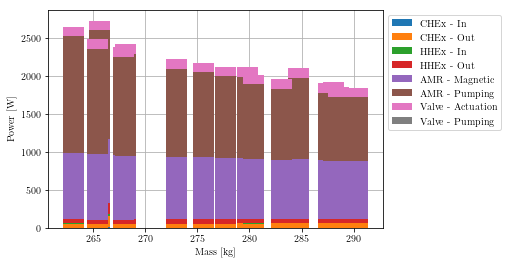

In [117]:
width = 2
plt.grid(zorder = 0)
plt.bar(m_p,W_p_CHEx_p, width, label = 'CHEx - In',zorder = 3)
plt.bar(m_p,W_p_HHEx_f, width, bottom = W_p_CHEx_p, label = 'CHEx - Out',zorder = 3)
plt.bar(m_p,W_p_HHEx_p, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f), label = 'HHEx - In',zorder = 3)
plt.bar(m_p,W_p_HHEx_f, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p), label = 'HHEx - Out',zorder = 3)
plt.bar(m_p,W_p_mag, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f), label = 'AMR - Magnetic',zorder = 3)
plt.bar(m_p,W_p_pump, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f)+ np.array(W_p_mag) , label = 'AMR - Pumping',zorder = 3)
plt.bar(m_p,W_pa_valve, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f) + np.array(W_p_mag) + np.array(W_p_pump) , label = 'Valve - Actuation',zorder = 3)
plt.bar(m_p,W_pa_p_valve, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f)+ np.array(W_p_mag) + np.array(W_p_pump)+ np.array(W_pa_valve), label = 'Valve - Pumping',zorder = 3)

#plt.xlim([575,865])
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
plt.legend(bbox_to_anchor = (1,1))
plt.savefig('Power_Breakdown.png',format = 'png', dpi=500,bbox_inches='tight')

In [118]:
m_La_p = np.pi*(np.array(R3_p)**2-np.array(R2_p)**2)*np.array(L_p)*(1-Epsilon)*7000*10**-9
m_Rt_p = np.pi*((np.array(R4_p))**2-np.array(R3_p)**2)*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500 #25**2
m_St_p = np.pi*((np.array(R2_p)**2))*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500
m_Fe_p = np.pi*((np.array(R4_p)+np.array(hf_p))**2-np.array(R4_p)**2)*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500 #25**2 


In [ ]:
width = 5
plt.grid(zorder = 0)
plt.bar(W_pa,m_La_p, width, label = 'La',zorder = 3)
plt.bar(W_pa,m_St_p, width,bottom = m_La_p, label = 'Stator',zorder = 3)
plt.bar(W_pa,m_Rt_p, width,bottom = np.array(m_La_p) + np.array(m_St_p), label = 'Rotor',zorder = 3)
plt.bar(W_pa,m_Fe_p, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p), label = 'Fe (10 mm)',zorder = 3)
#plt.bar(W_pa,m_Fe_p_80, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p)+ np.array(m_Fe_p_10)+ np.array(m_Fe_p_20)+ np.array(m_Fe_p_40), label = 'Fe (80 mm)',zorder = 3)
plt.legend( bbox_to_anchor=[1, 1])
plt.ylabel('Mass [kg]')
plt.xlabel('Power [W]')
#plt.xlim(870,1300)
#plt.ylim(0,1050)
plt.savefig('Mass_Breakdown.png',format = 'png', dpi=500,bbox_inches='tight')